 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

# Create a path to the file:
whale_csv_path = Path("whale_returns.csv")

# Read the CSV into a DataFrame using Pandas
whale_dataframe = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_dataframe.head(11)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
whale_dataframe.isnull().sum() 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_dataframe = whale_dataframe.dropna()
whale_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

# Create a path to the file:
algo_returns_path = Path("algo_returns.csv")

# Read the CSV into a DataFrame using Pandas
algo_dataframe = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_dataframe.head(11)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_dataframe.isnull().sum() 

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna()
algo_dataframe

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
# Create a path to the file:
sp500_history_path = Path("sp500_history.csv")

# Read the CSV into a DataFrame using Pandas
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history.head(11)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [9]:
# Check Data Types

sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

# Clean identified numeric fields with $ symbol

sp500_history['Close'] = sp500_history['Close'].str.replace('$','',regex=False)
sp500_history["Close"]

# Fix Data Types


sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [11]:
# Calculate Daily Returns

sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head(11)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038


In [12]:
# Drop nulls

sp500_daily_returns = sp500_daily_returns.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "S&P 500 Closing Price"})

sp500_daily_returns.head(11)


,S&P 500 Closing Price
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038
2019-04-09,-0.003466


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

joined_data = pd.concat([whale_dataframe, algo_dataframe, sp500_daily_returns], axis='columns', join='inner')

joined_data.head(11)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Closing Price
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

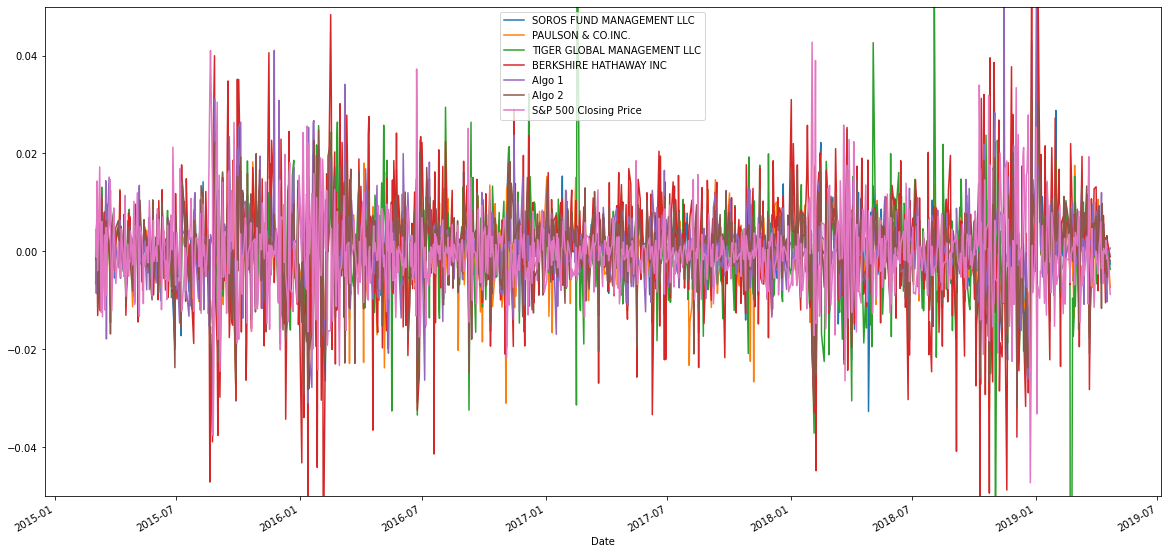

In [56]:
# Plot daily returns of all portfolios

#joined_data.plot(figsize=(20,10));

joined_data.plot(ylim=[-.05,.05],figsize=(20,10));

#### Calculate and Plot cumulative returns.

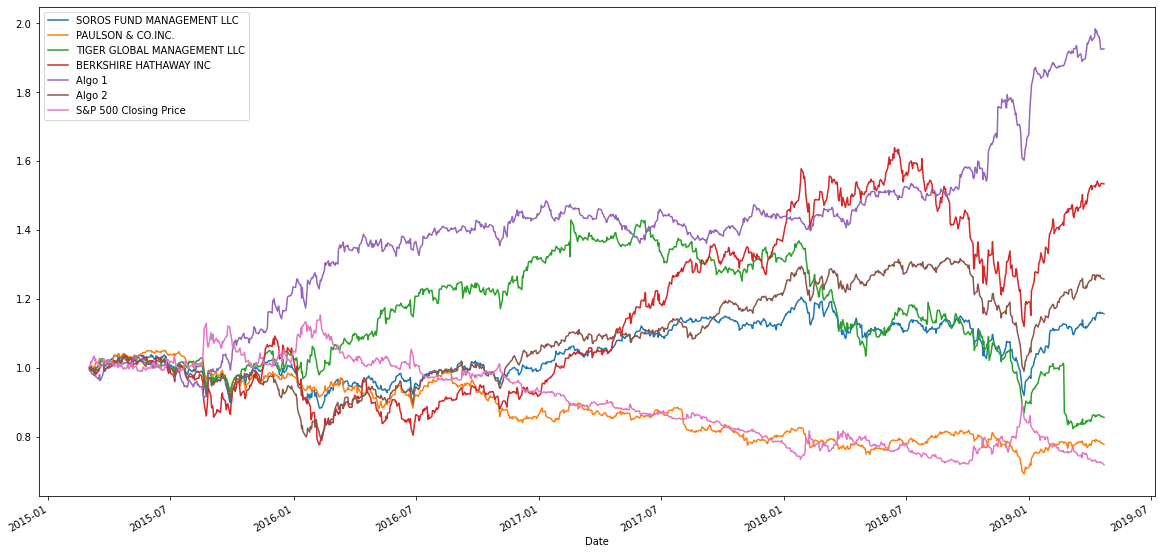

In [16]:
# Calculate cumulative returns of all portfolios
cum_returns = (1+joined_data).cumprod()

# Plot cumulative returns
cum_returns.plot(figsize=(20,10));


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


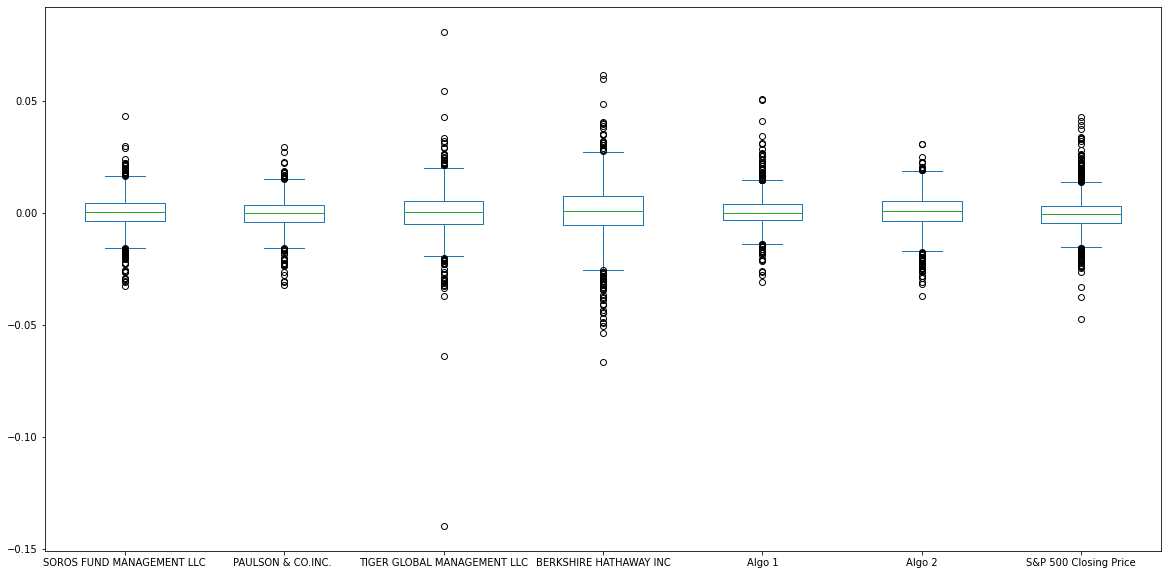

In [17]:
# Box plot to visually show risk

joined_data.plot.box(figsize=(20,10));

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

joined_data_std = joined_data.std()
joined_data_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Closing Price          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

isolated_sp500 = joined_data["S&P 500 Closing Price"].std()

# Determine which portfolios are riskier than the S&P 500

joined_data_std > isolated_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500 Closing Price          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = joined_data_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500 Closing Price          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

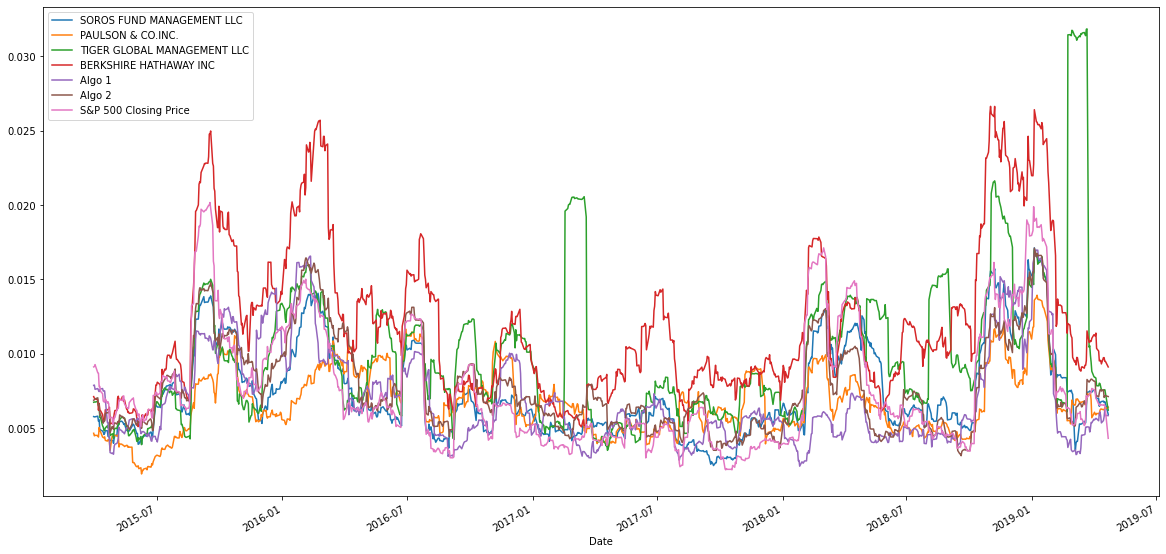

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

portfolio_21_day_std = joined_data.rolling(window = 21).std()
# Plot the rolling standard deviation
portfolio_21_day_std.plot(figsize=(20, 10));

### Calculate and plot the correlation

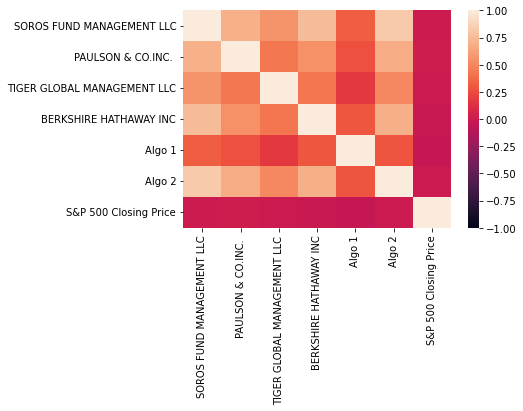

In [22]:
# Calculate the correlation
correlation = joined_data.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

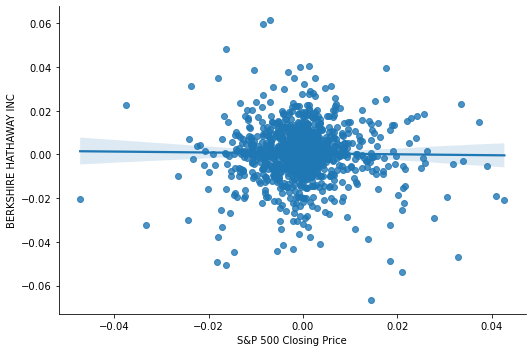

In [23]:
# Calculate covariance of a single portfolio
covariance = joined_data['BERKSHIRE HATHAWAY INC'].cov(joined_data['S&P 500 Closing Price'])
covariance

# Calculate variance of S&P 500
variance = joined_data['S&P 500 Closing Price'].var()
variance

# Computing beta
beta = covariance / variance
beta

# Plot beta trend

sns.lmplot(x = "S&P 500 Closing Price", y = "BERKSHIRE HATHAWAY INC", data = joined_data, aspect = 1.5, fit_reg = True);


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

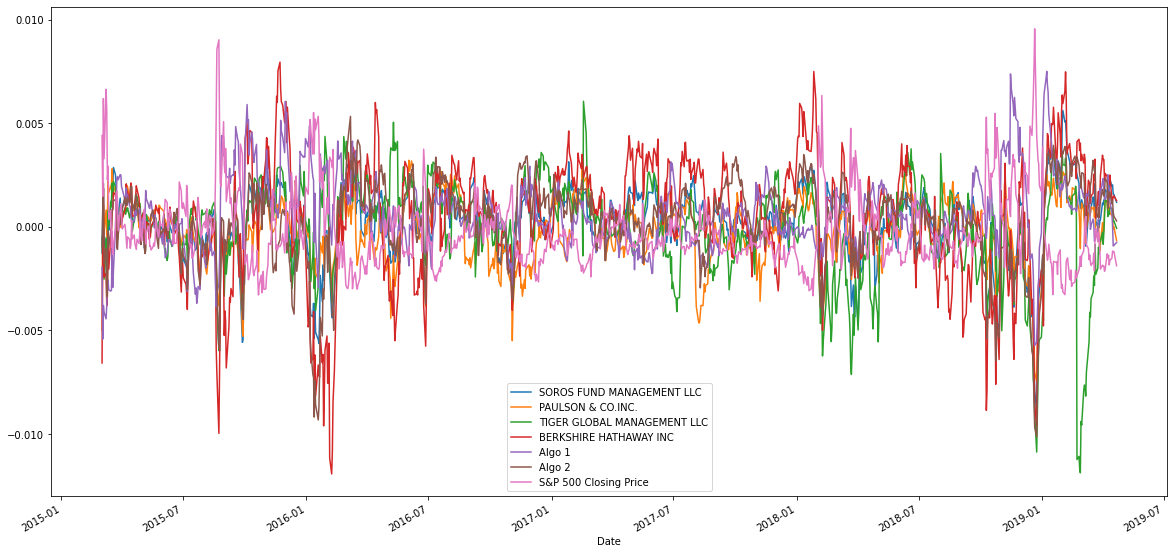

In [24]:
# Use `ewm` to calculate the rolling window

joined_data.ewm(span=21, axis="index").mean().plot(figsize=(20,10));

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data.mean() -0) / (joined_data.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.001361
PAULSON & CO.INC.             -0.001950
TIGER GLOBAL MANAGEMENT LLC   -0.000517
BERKSHIRE HATHAWAY INC         0.002408
Algo 1                         0.005435
Algo 2                         0.001922
S&P 500 Closing Price         -0.002058
dtype: float64

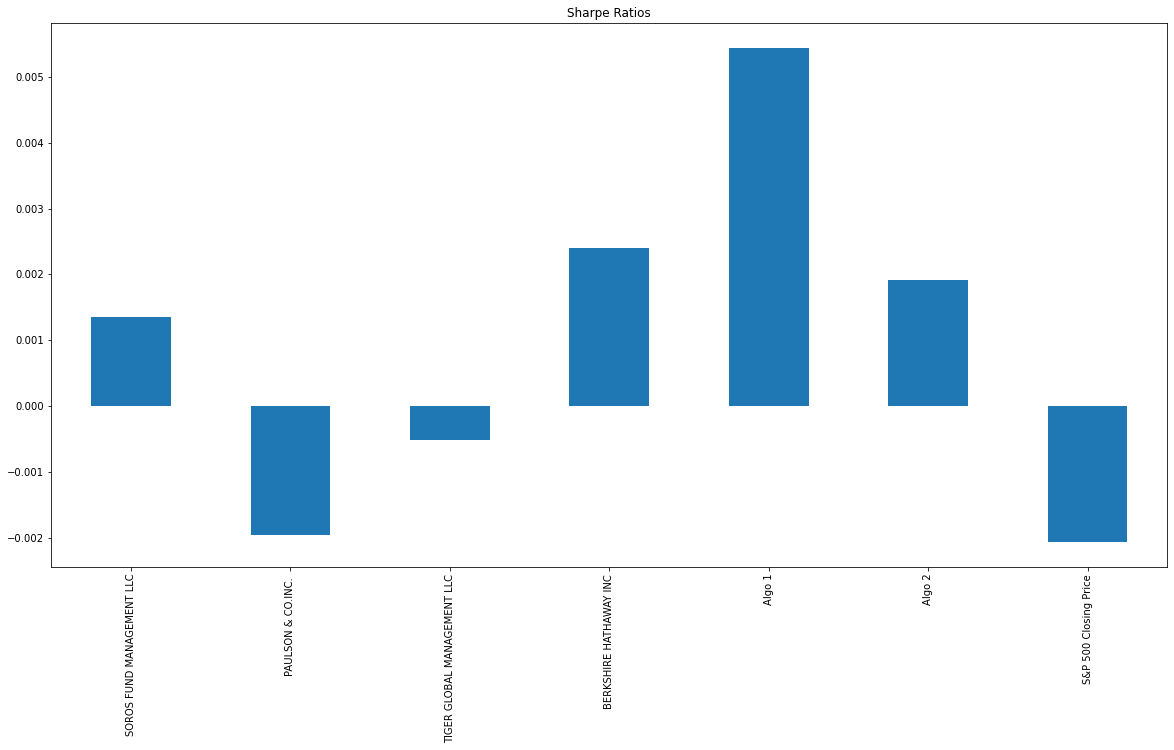

In [26]:
# Visualize the sharpe ratios as a bar plottitle="Sharpe Ratios")
sharpe_ratios.plot.bar(figsize=(20,10), title="Sharpe Ratios");


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

- Algo 1 portfolio outperforms the S&P 500 index and the whale portfolios. 

- Although Algo 2 does out performs the S&P500, it does not out perform the whale portfolio of Berkshire Hathway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
# Reading EurUsd returns

# Create a path to the file:
eurusd_path = Path("EurUsd.csv")

# Read the CSV into a DataFrame using Pandas
eurusd_dataframe = pd.read_csv(eurusd_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurusd_dataframe.dropna()
eurusd_dataframe.head()
# Check for nulls
#eurusd_returns.isnull().sum()

# Drop nulls 
#eurusd_returns = eurusd_dataframe.dropna()
#eurusd_returns
# Average Returns / drop nulls
# eurusd_returns = eurusd_dataframe.pct_change().dropna()
#eurusd_returns.head(11)
# re name closing price to identify it on dataframe

#eurusd_returns = eurusd_returns.rename(columns={"Close": "EurUsd Closing Price"})

#eurusd_returns.dropna
# eurusd_returns.count()
# eurusd_returns.isnull().mean()*100

# eurusd_returns.astype("float")




,Close
Date,
2012-10-01,1.28858
2012-10-02,1.29160
2012-10-03,1.29180
2012-10-04,1.30190
2012-10-05,1.30330


In [28]:
# Reading data from 2nd stock
# Reading GbpUsd returns

# Create a path to the file:
gbpusd_path = Path("GbpUsd.csv")

# Read the CSV into a DataFrame using Pandas
gbpusd_dataframe = pd.read_csv(gbpusd_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
gbpusd_dataframe.head(11)

# Average Returns / drop nulls
# gbpusd_returns = gbpusd_dataframe.pct_change().dropna()

# re name closing price to identify it on dataframe

#gbpusd_returns = gbpusd_returns.rename(columns={"Close": "GbpUsd Closing Price"})


#gbpusd_returns.head(11)

,Close
Date,
2012-10-01,1.61310
2012-10-02,1.61300
2012-10-03,1.60920
2012-10-04,1.61910
2012-10-05,1.61310
2012-10-06,1.61320
2012-10-07,1.61320
2012-10-08,1.60190
2012-10-09,1.59972


In [29]:
# Reading data from 3rd stock
# Reading EurGbp returns

# Create a path to the file:
eurgbp_path = Path("EurGbp.csv")

# Read the CSV into a DataFrame using Pandas
eurgbp_dataframe = pd.read_csv(eurgbp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurgbp_dataframe.head(11)


# Average Returns / drop nulls
#eurgbp_returns = eurgbp_dataframe.pct_change().dropna()

# re name closing price to identify it on dataframe

#eurgbp_returns = eurgbp_returns.rename(columns={"Close": "EurGbp Closing Price"})

#eurgbp_returns.head(11)

,Close
Date,
2012-10-01,0.79890
2012-10-02,0.80070
2012-10-03,0.80193
2012-10-04,0.80367
2012-10-05,0.80780
2012-10-06,0.80740
2012-10-07,0.80680
2012-10-08,0.80920
2012-10-09,0.80449


In [30]:
# Reading data from 4th stock

# Reading UsdCad returns

# Create a path to the file:
usdcad_path = Path("UsdCad.csv")

# Read the CSV into a DataFrame using Pandas
usdcad_dataframe = pd.read_csv(usdcad_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdcad_dataframe.head(11)

# Average Returns / drop nulls
#usdcad_returns = usdcad_dataframe.pct_change().dropna()

# re name closing price to identify it on dataframe

#usdcad_returns = usdcad_returns.rename(columns={"Close": "UsdCad Closing Price"})

#usdcad_returns.head(11)

,Close
Date,
2012-10-01,0.98170
2012-10-02,0.98390
2012-10-03,0.98610
2012-10-04,0.98065
2012-10-05,0.97840
2012-10-06,0.97840
2012-10-07,0.97800
2012-10-08,0.97690
2012-10-09,0.97850


In [31]:
# Reading data from 5th stock

# Reading UsdJpy returns

# Create a path to the file:
usdjpy_path = Path("UsdJpy.csv")

# Read the CSV into a DataFrame using Pandas
usdjpy_dataframe = pd.read_csv(usdjpy_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdjpy_dataframe.head(11)

# Average Returns / drop nulls
#usdjpy_returns = usdjpy_dataframe.pct_change().dropna()

# re name closing price to identify it on dataframe

#usdjpy_returns = usdjpy_returns.rename(columns={"Close": "UsdJpy Closing Price"})

#usdjpy_returns.head(11)

,Close
Date,
2012-10-01,78.011
2012-10-02,78.164
2012-10-03,78.479
2012-10-04,78.449
2012-10-05,78.670
2012-10-06,78.620
2012-10-07,78.693
2012-10-08,78.340
2012-10-09,78.243


In [32]:
# Reading data from 6th stock

# Reading AudUsd returns

# Create a path to the file:
audusd_path = Path("AudUsd.csv")

# Read the CSV into a DataFrame using Pandas
audusd_dataframe = pd.read_csv(audusd_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
audusd_dataframe.head(11)

# Average Returns / drop nulls
#audusd_returns = audusd_dataframe.pct_change().dropna()

# re name closing price to identify it on dataframe

#audusd_returns = audusd_returns.rename(columns={"Close": "AudUsd Closing Price"})


#audusd_returns.head(11)

,Close
Date,
2012-10-01,1.03560
2012-10-02,1.02540
2012-10-03,1.02300
2012-10-04,1.02391
2012-10-05,1.01830
2012-10-06,1.01670
2012-10-07,1.01640
2012-10-08,1.02000
2012-10-09,1.02065


In [33]:
# Combine all stocks in a single DataFrame

forex = pd.concat([eurusd_dataframe, gbpusd_dataframe, eurgbp_dataframe, usdcad_dataframe, usdjpy_dataframe, audusd_dataframe], axis='columns', join='inner')
forex.dropna()
#forex.index_col="Date"
#forex.dropna().head()

,Close,Close,Close,Close,Close,Close
Date,,,,,,
2012-10-01,1.28858,1.61310,0.79890,0.98170,78.011,1.03560
2012-10-02,1.29160,1.61300,0.80070,0.98390,78.164,1.02540
2012-10-03,1.29180,1.60920,0.80193,0.98610,78.479,1.02300
2012-10-04,1.30190,1.61910,0.80367,0.98065,78.449,1.02391
2012-10-05,1.30330,1.61310,0.80780,0.97840,78.670,1.01830
...,...,...,...,...,...,...
2019-04-18,1.12340,1.29907,0.86460,1.33760,111.989,0.71440
2019-04-19,1.12450,1.29950,0.86530,1.33980,111.915,0.71550
2019-04-20,1.12440,1.29950,0.86540,1.33970,111.915,0.71560


In [34]:
# Reset Date index
# forex.reset_index(inplace=True)

In [35]:
# Reorganize portfolio data by having a column per symbol


forex_columns = ["EurUsd Closing Price", "GbpUsd Closing Price", "EurGbp Closing Price", "UsdCad Closing Price", "UsdJpy Closing Price", "AudUsd Closing Price"]
forex.columns = forex_columns
forex


,EurUsd Closing Price,GbpUsd Closing Price,EurGbp Closing Price,UsdCad Closing Price,UsdJpy Closing Price,AudUsd Closing Price
Date,,,,,,
2012-10-01,1.28858,1.61310,0.79890,0.98170,78.011,1.03560
2012-10-02,1.29160,1.61300,0.80070,0.98390,78.164,1.02540
2012-10-03,1.29180,1.60920,0.80193,0.98610,78.479,1.02300
2012-10-04,1.30190,1.61910,0.80367,0.98065,78.449,1.02391
2012-10-05,1.30330,1.61310,0.80780,0.97840,78.670,1.01830
...,...,...,...,...,...,...
2019-04-18,1.12340,1.29907,0.86460,1.33760,111.989,0.71440
2019-04-19,1.12450,1.29950,0.86530,1.33980,111.915,0.71550
2019-04-20,1.12440,1.29950,0.86540,1.33970,111.915,0.71560


In [36]:
# Calculate daily returns
forex_daily_returns = forex.pct_change()

# Drop NAs-
clean_forex_daily_returns = forex_daily_returns.dropna().copy()

# Display sample data
clean_forex_daily_returns.head()

,EurUsd Closing Price,GbpUsd Closing Price,EurGbp Closing Price,UsdCad Closing Price,UsdJpy Closing Price,AudUsd Closing Price
Date,,,,,,
2012-10-02,0.002344,-0.000062,0.002253,0.002241,0.001961,-0.009849
2012-10-03,0.000155,-0.002356,0.001536,0.002236,0.004030,-0.002341
2012-10-04,0.007819,0.006152,0.002170,-0.005527,-0.000382,0.000890
2012-10-05,0.001075,-0.003706,0.005139,-0.002294,0.002817,-0.005479
2012-10-06,-0.000153,0.000062,-0.000495,0.000000,-0.000636,-0.001571


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2012-10-02   -0.000185
2012-10-03    0.000543
2012-10-04    0.001853
2012-10-05   -0.000408
2012-10-06   -0.000466
dtype: float64


Date
2017-12-15   -0.000066
dtype: float64

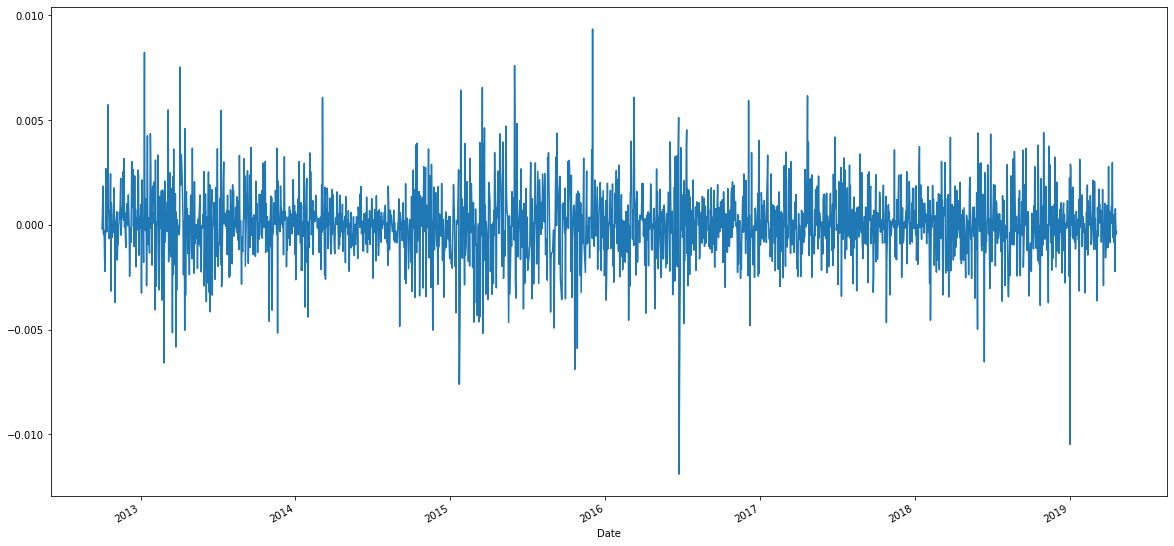

In [37]:
# Set weights
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]


eurusd_weight = 0.16
gbpusd_weight = 0.16
eurgbp_weight = 0.16
usdcad_weight = 0.16
usdjpy_weight = 0.16
audusd_weight = 0.16

# Calculate portfolio return
# forex_portfolio_returns = eurusd_weight * forex["EurUsd Closing Price"] + gbpusd_weight * forex["GbpUsd Closing Price"] + eurgbp_weight * forex["EurGbp Closing Price"] + usdcad_weight * forex["UsdCad Closing Price"] + usdjpy_weight * forex["UsdJpy Closing Price"] + audusd_weight * forex["AudUsd Closing Price"]
forex_portfolio_returns = clean_forex_daily_returns.dot(weights)
print(forex_portfolio_returns.head())

# Display sample data
forex_portfolio_returns.plot(figsize=(20, 10));

forex_portfolio_returns.sample()



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [62]:
combined_data = joined_data.copy()
combined_data["custom_portfolio"] = forex_portfolio_returns

In [63]:
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Closing Price,custom_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.000044
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.003718
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.000967
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.004321
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000061


In [64]:
# Join your returns DataFrame to the original returns DataFrame
# combined_data = pd.concat([joined_data, forex_portfolio_returns], axis='columns', join='inner')
# combined_data.head()

In [65]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

#combined_data.rename(columns={"0": "Forex"},inplace=True)
#  combined_data.head()


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [66]:
# Calculate the annualized `std`
combined_data_std = combined_data.std() * np.sqrt(252)
combined_data_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500 Closing Price          0.136313
custom_portfolio               0.030474
dtype: float64

### Calculate and plot rolling `std` with 21-day window

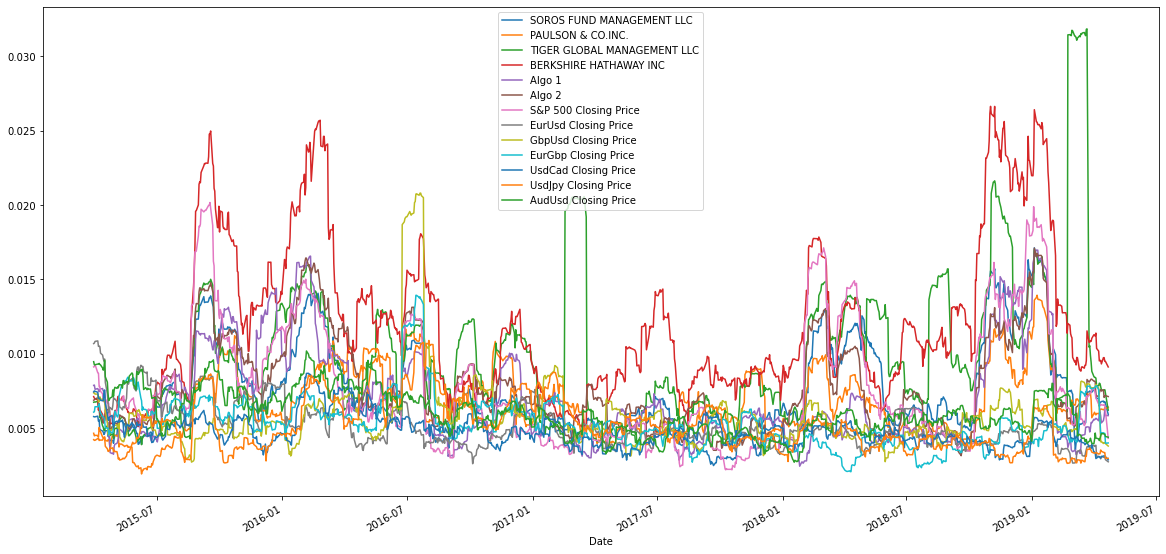

In [41]:
# Calculate rolling standard deviation
combined_data_21_day_std = combined_data.rolling(window = 21).std()

# Plot rolling standard deviation
combined_data_21_day_std.plot(figsize=(20, 10));

### Calculate and plot the correlation

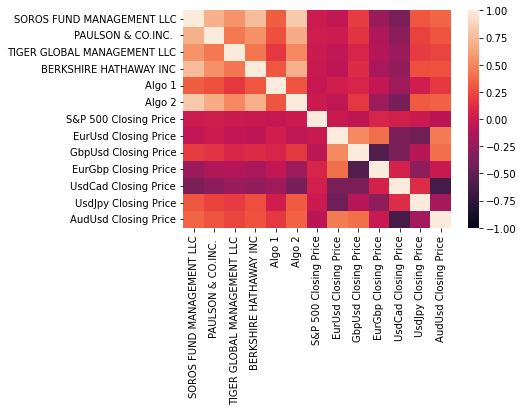

In [42]:
# Calculate and plot the correlation

correlation = combined_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

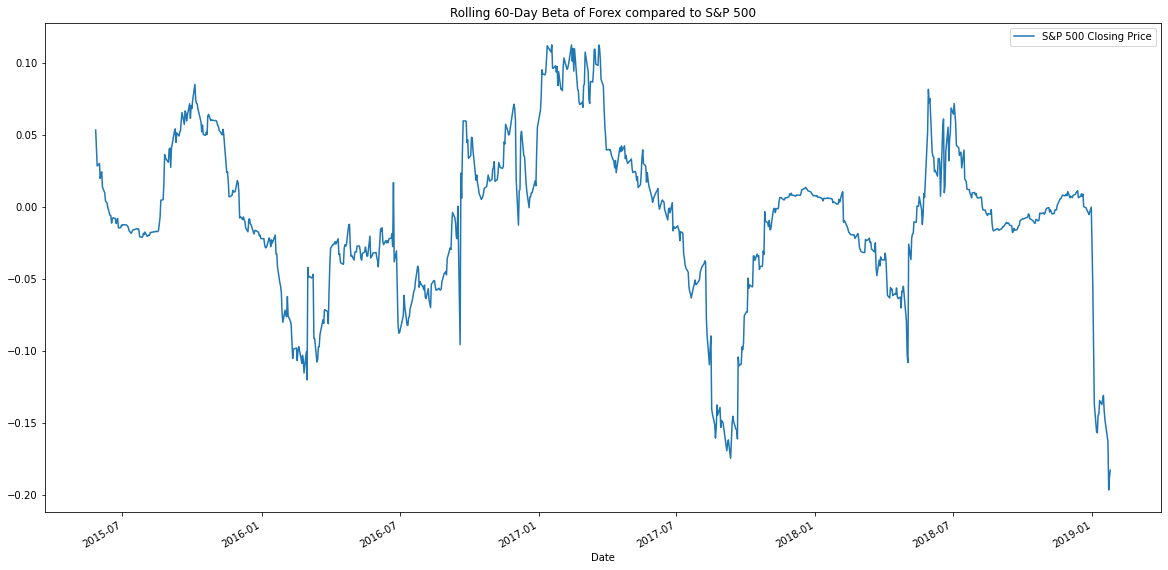

In [68]:
# Calculate and plot Beta

rolling_covariance = combined_data['custom_portfolio'].rolling(window=60).cov(sp500_daily_returns)
rolling_variance = sp500_daily_returns.rolling(window=60).var()



rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Forex compared to S&P 500');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualized Sharpe Ratios

combined_data_sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
combined_data_sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Closing Price         -0.518582
custom_portfolio               0.099131
dtype: float64

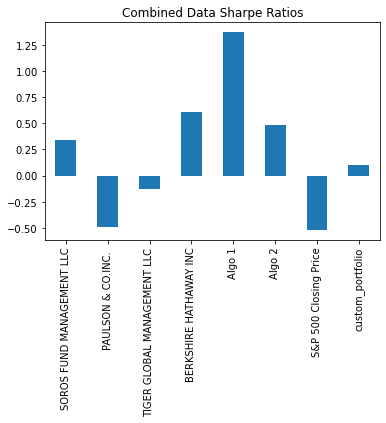

In [70]:
# Visualize the sharpe ratios as a bar plot

combined_data_sharpe_ratios.plot(kind="bar", title= "Combined Data Sharpe Ratios");


### How does your portfolio do?

Write your answer here!